In [1]:
# Libraries

import numpy
import os
import shutil
import warnings

In [2]:
# Code

from src.data.feature import annodata as data_anndata
from src.data.feature import tsne     as data_tsne
from src.io           import loader   as data_loader

# 1. Setup

In [3]:
# Setup some directory paths

OUT_SUBFOLDER = 'nbp03-tsne'
RES_SUBFOLDER = ''

CWD = os.getcwd()
OUT = os.path.join(CWD, 'out')
RES = os.path.join(CWD, 'res')

OUT_PLOT  = os.path.join(OUT, 'plot',  OUT_SUBFOLDER)
RES_NBP02 = os.path.join(OUT, 'data',  'nbp02-anndata')

shutil.rmtree(OUT_PLOT, ignore_errors = True)

os.makedirs(OUT_PLOT, exist_ok = True)

print(f'     Root Directory : {CWD}')
print(f'   Output Directory : {OUT}')
print(f' Resource Directory : {RES}')

     Root Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis
   Output Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\out
 Resource Directory : C:\Developer\Workspace\PyCharm\Projects\upolanc-thesis\res


In [4]:
# Load the annotated data

anndata = data_loader.load_h5ad(
	filename = os.path.join(RES_NBP02, 'arabidopsis-r36.h5ad')
)

In [5]:
# Select the most prominent genes (not implemented)

# with warnings.catch_warnings() :
# 	warnings.simplefilter('ignore')

# 	mask = data_tsne.select_genes(
# 		matrix    = anndata.X,
# 		n         = 3000,
# 		threshold = 0,
# 		decay     = 1,
# 		xoffset   = 5,
# 		yoffset   = 0.02
# 	)

# 	anndata = anndata[:, mask].copy()

# 2. PCA

In [6]:
# Compute and save the pca from standardized log1p values and keep the top 50 components

anndata = data_anndata.compute_pca(
	data       = anndata,
	layer      = 'standard',
	store_into = 'pca50',
	components = 50
)

# 3. TSNE

In [7]:
# Compute and save the tsne embeddings

anndata = data_tsne.compute_tsne(
	data       = anndata,
	features   = 'pca50',
	store_into = 'tsne'
)

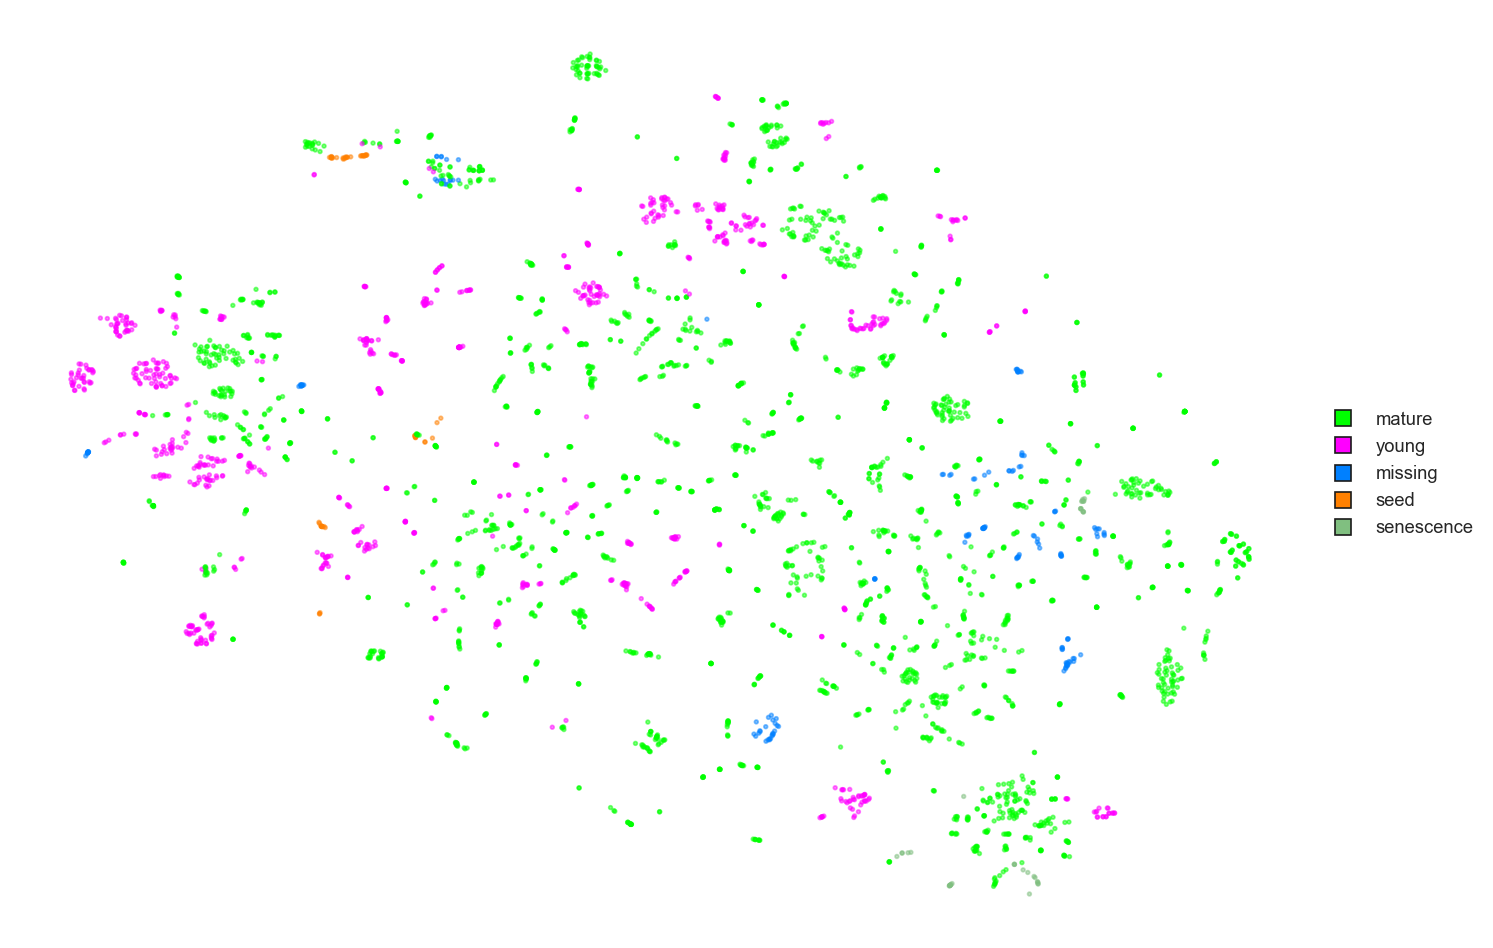

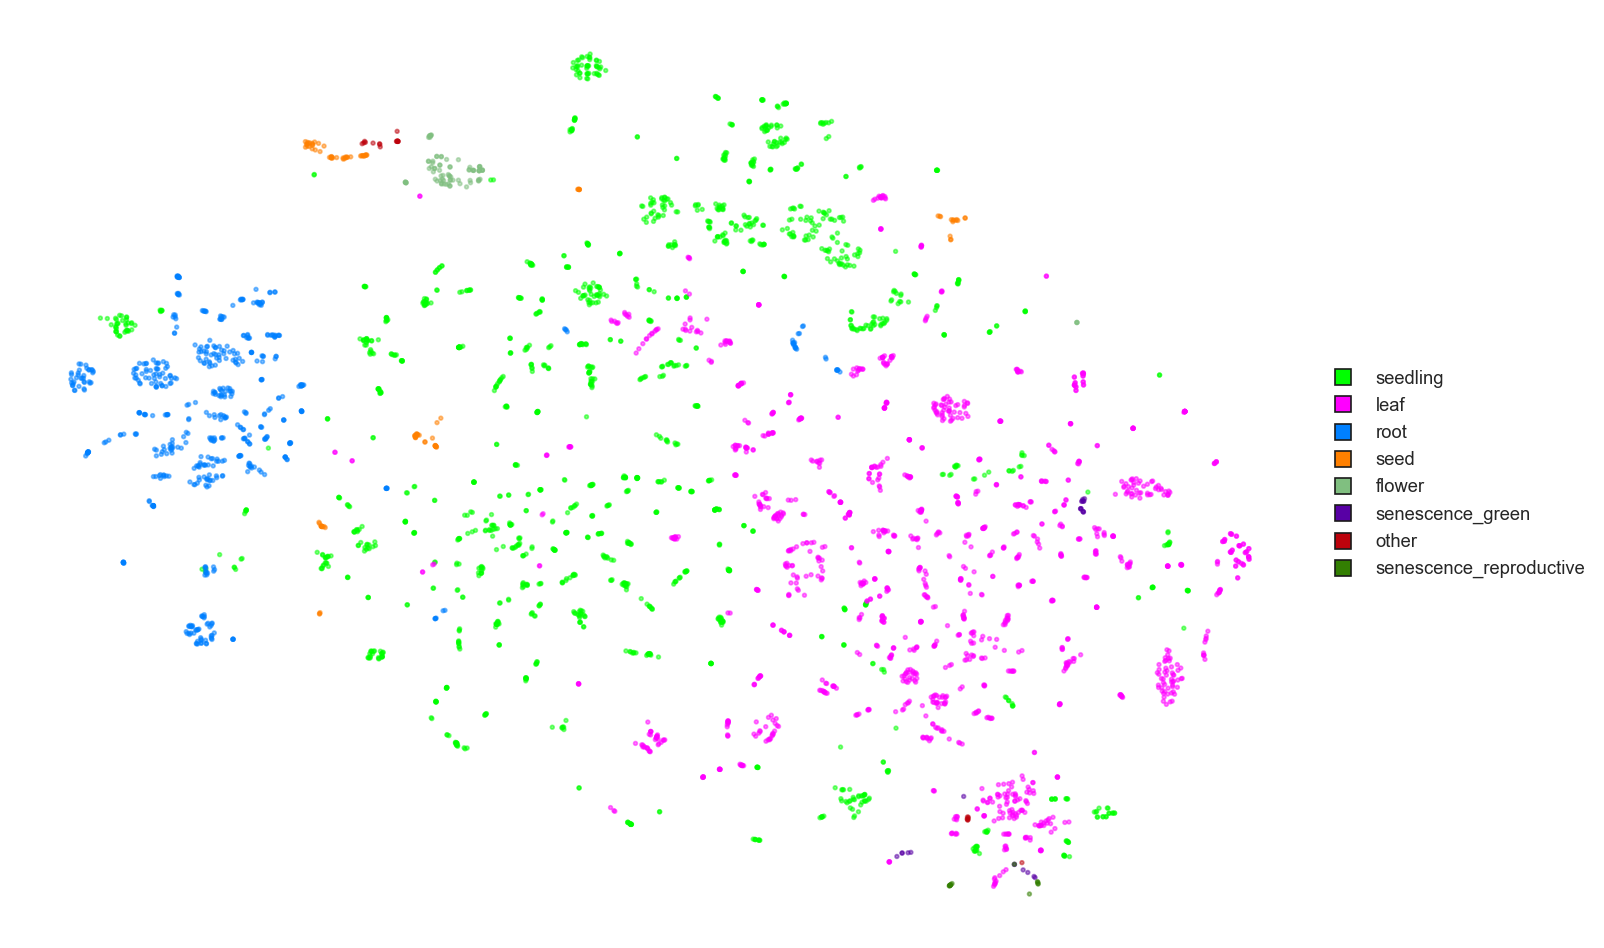

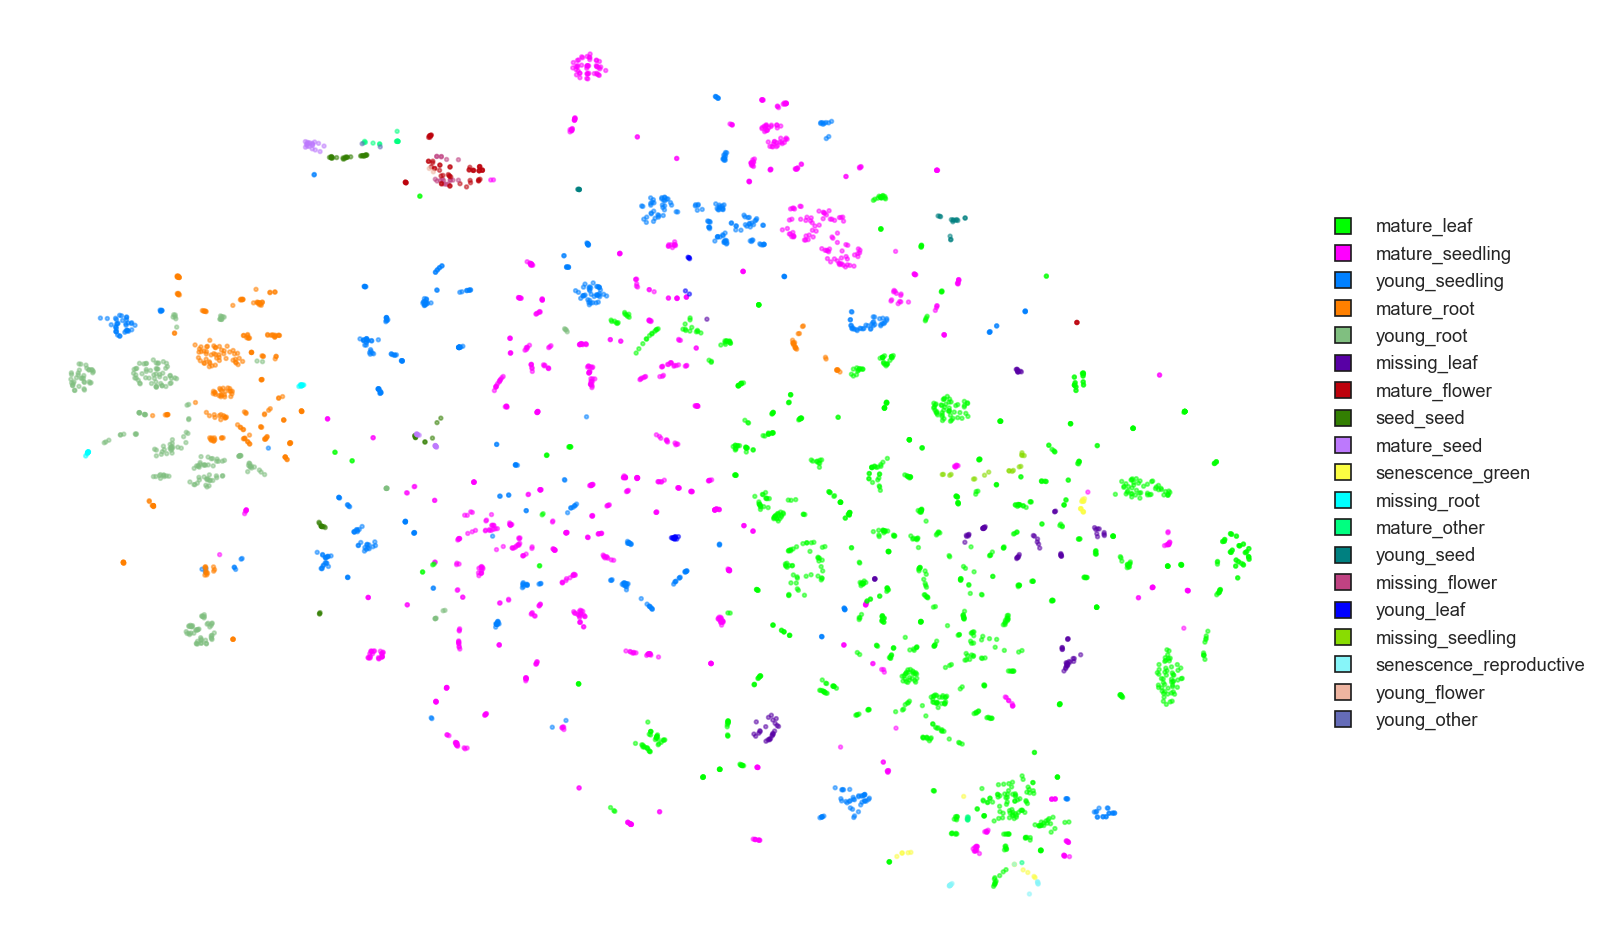

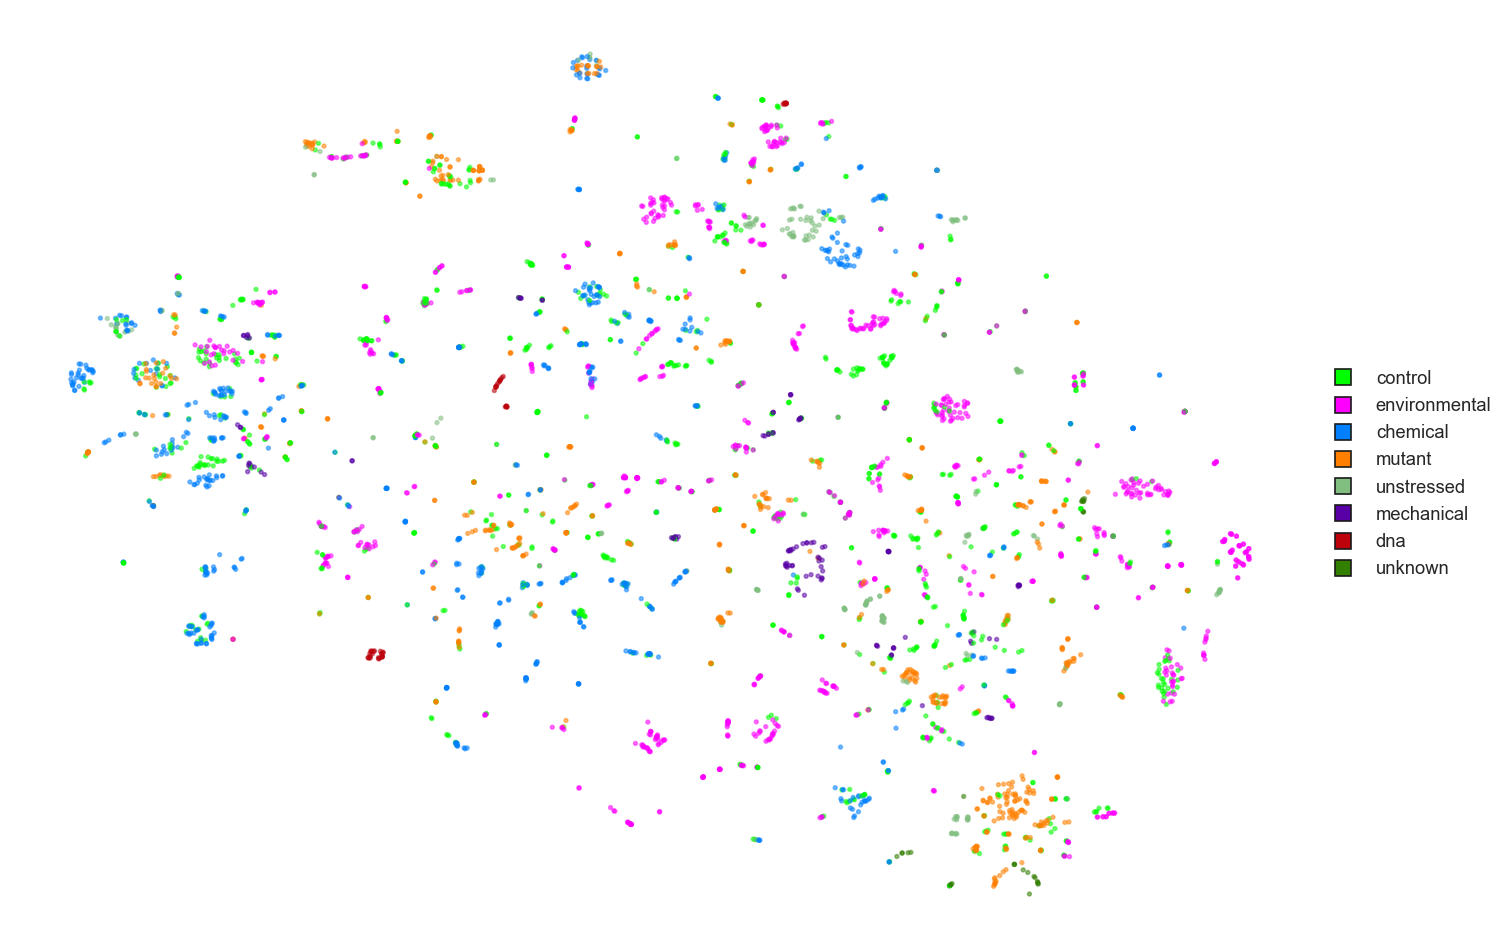

In [8]:
# Display tsne visualization for diffrent gene groups

data_tsne.visualize(
	data     = anndata,
	feature  = 'tsne',
	groupby  = 'Age',
	filename = os.path.join(OUT_PLOT, 'tsne-age'),
	alpha    = 0.5,
	size     = 5
)

data_tsne.visualize(
	data     = anndata,
	feature  = 'tsne',
	groupby  = 'Tissue',
	filename = os.path.join(OUT_PLOT, 'tsne-tissue'),
	alpha    = 0.5,
	size     = 5
)

data_tsne.visualize(
	data     = anndata,
	feature  = 'tsne',
	groupby  = 'Group',
	filename = os.path.join(OUT_PLOT, 'tsne-group'),
	alpha    = 0.5,
	size     = 5
)

data_tsne.visualize(
	data     = anndata,
	feature  = 'tsne',
	groupby  = 'Perturbation',
	filename = os.path.join(OUT_PLOT, 'tsne-perturbation'),
	alpha    = 0.5,
	size     = 5
)